# PCA Regression  and Regularized Regression( Lasso) 

## Principle Component Analysis (Regression) with Abalone Dataset competition

In [2]:
import os
os.chdir("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Assignment 3")
print(os.getcwd())  # Verify change


C:\Users\ghimi\OneDrive\Desktop\PHD in Data Science\4_Predictive Analysis_TIM8555\Assignment 3


In [3]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [56]:
import pandas as pd

train_data = pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Dataset/train.csv")
test_data = pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Dataset/test.csv")

# Check for missing values
print(train_data.isnull().sum())


id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


In [5]:
print(train_data.head())


   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9  


In [6]:
print(test_data.head())

      id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  
0          0.3125        0.3005  
1          0.2195        0.2750  
2          0.1845        0.2405  
3          0.1865        0.2350  
4          0.0670        0.1050  


In [7]:
print(train_data.info())  # Displays information about the dataset (columns, data types, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB
None


In [8]:
print(test_data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB
None


Check for missing data

In [10]:
print(train_data.isnull().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


In [11]:
print(test_data.isnull().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64


In [12]:
#Convert the Sex feature into numerical categories.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.transform(test_data['Sex'])


In [13]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  int32  
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int32(1), int64(2)
memory usage: 6.6 MB
None


# Principle Component Regression 

### Step 1: Import Necessary Libraries

 need libraries like pandas, numpy, sklearn for PCA, regression, and metrics.


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


### Step 2: Review the test data and train data




In [18]:
from sklearn.model_selection import train_test_split
X = train_data.drop(columns=['Rings'])
y = train_data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Standardize the Data
Since PCA is sensitive to scale, standardize the data using StandardScaler.

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Step 4: Perform Principle Component Analysis( PCA)
Apply PCA to reduce the dimensionality of the dataset.

In [22]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# To check the variance explained by each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)


[0.72757172 0.83924346 0.94971265 0.97129375 0.98443157 0.99267311
 0.99768492 0.99888767 1.        ]


### Step 5: Lets retain compoents which has 95% of the variance

we can choose how many principal components to retain based on the explained variance, typically the number of components that explain 95-99% of the variance.

In [24]:
# Let's  retain components explaining 95% of the variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components to explain 95% variance: {n_components}')

Number of components to explain 95% variance: 4


### Step 6: Reapply with selected numbers of components



In [26]:
# Reapply PCA with selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Step 7: Perform Linear Regression on the Principle Component


In [28]:
# Fit a linear regression model
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train)

# Predict on test set
y_pred = regressor.predict(X_test_pca)


### Step 8: Evaluate the Model

Evaluate the performance of the regression model using Mean Squared Error (MSE) or other metrics.


Mean Squared Error: 5.623408041767899


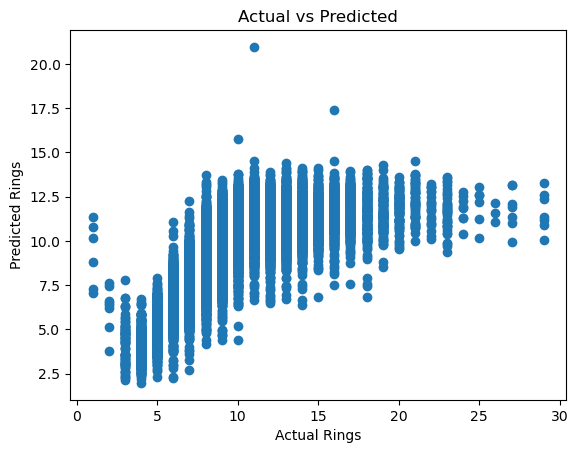

In [30]:
# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, visualize the results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted')
plt.show()


### Step 9 Tune the number of Principle Components:
While retaining 95% of the variance is a common practice, we want to experiment with fewer or more components to see if it improves the model's performance. Sometimes, fewer components may lead to better generalization, while more components could overfit the data.

In [32]:
# Experiment with different numbers of components
for n in range(1, X_train_pca.shape[1]):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    regressor.fit(X_train_pca, y_train)
    y_pred = regressor.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE with {n} components: {mse}')


MSE with 1 components: 6.101512073840964
MSE with 2 components: 6.101348320895375
MSE with 3 components: 6.103524680363612


###  Step 10: Add More Component
Continue adding more components to see if the MSE improves after a certain threshold. 
Sometimes more components may be necessary to capture enough variance.

In [34]:
for n in range(4, X_train_pca.shape[1]):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    regressor.fit(X_train_pca, y_train)
    y_pred = regressor.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE with {n} components: {mse}')


In [44]:

# For model parameters
print("Model Parameters: ", rf_model.get_params())

Model Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [42]:
# For feature importance
print("Feature Importances: ", rf_model.feature_importances_)

Feature Importances:  [0.63666859 0.18086904 0.18246237]


### Step  12: Applying Regularazed Technique Ridge Regression 

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Define the range of alpha values to tune
alpha_values = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}

# Initialize Ridge Regression
ridge_model = Ridge()

# Set up GridSearchCV with Ridge and cross-validation
grid_search = GridSearchCV(ridge_model, alpha_values, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data (PCA transformed)
grid_search.fit(X_train_pca, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha value found: {best_alpha}')

# Make predictions with the best model
y_pred_best_ridge = grid_search.predict(X_test_pca)

# Calculate MSE
best_ridge_mse = mean_squared_error(y_test, y_pred_best_ridge)
print(f'Best Ridge Regression MSE: {best_ridge_mse}')


Best alpha value found: 100.0
Best Ridge Regression MSE: 6.103519089089072


In [52]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # You can tune alpha
ridge_model.fit(X_train_pca, y_train)
y_pred_ridge = ridge_model.predict(X_test_pca)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')


Ridge Regression MSE: 6.103524622533376


we can tune the alpha parameter to control the amount of regularization. A higher value of alpha means stronger regularization and more coefficient shrinkage.

### Step 13 : Polynomial Features
Introducing polynomial features in your data, 
especially if the relationship between predictors and target is non-linear.

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

regressor.fit(X_train_poly, y_train)
y_pred_poly = regressor.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Polynomial Regression MSE: {mse_poly}')


Polynomial Regression MSE: 5.818991438857451


### Step : Changing to the different model
Using Random Forest Regressor to better capture the relationship of the data





In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_test_pca)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')


Random Forest MSE: 5.8893702698228765


Polynomial Regression MSE: 5.82 and Random forest MSR is 5.89. In this case, the Polynomial Regression performs slightly better than Random Forest in terms of MSE (lower is better). However, the difference is not very large. For polygonial regression  prone to high variance if the degree is too high, leading to overfitting. However, since your MSE is relatively low, it appears that the model generalizes fairly well. For Random Forest casue, model typically has a lower variance because it averages predictions from multiple trees, but it can have higher bias if there are many shallow trees. As the degree of the polynomial increases, the model complexity increases, which can lead to overfitting, especially for a high degree. Random Forest   model handles complex, non-linear relationships inherently without needing feature engineering like polynomial terms. It tends to perform better with large datasets and more complex interactions. In terms of feature importance, It’s harder to interpret which individual features have the most impact, especially as polynomial degrees increase.Random Forest is better because fRicheature importance can be directly extracted, providing insight into which features contribute most to the prediction. In terms of prediction stability,if our data has non-linear relationships that are well captured by polynomial terms, this model can perform better. Random Forest model frovides more stable predictions in the presence of noise because it uses bagging and ensemble learning.
Since we looked the polynomial regression MSE is 5.82, Random foreset MSE is 5.89 and Ridge Regression after tuning is 6.10. The Ridge Regression model, after tuning, has a slightly higher MSE compared to both the Polynomial Regression and Random Forest models. This suggests that while regularization might have helped avoid overfitting, the linear nature of the Ridge model doesn't capture the non-linearity in the dataset as well as the other models.

In [54]:
import os
print(os.getcwd())  # This will print the current working directory


C:\Users\ghimi\OneDrive\Desktop\PHD in Data Science\4_Predictive Analysis_TIM8555\Assignment 3
